In [23]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [24]:
df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']
le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_encoded, test_size = 0.2)

In [32]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495,male
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773,male
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240,female
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419,female
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663,female


# Random Forest with different no. of Decisions Trees

In [27]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix  

******* Training the Random Forest using the n_estimators=10 ********
Accuracy is: 0.9794952681388013
Precision is: 0.9837133550488599
Recall is: 0.9741935483870968
F1-Score is: 0.9789303079416531


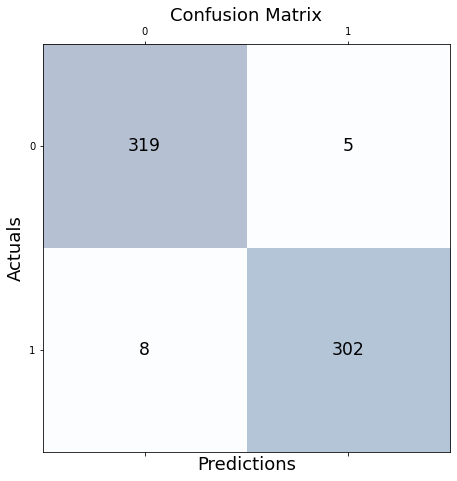


******* Training the Random Forest using the n_estimators=50 ********
Accuracy is: 0.9826498422712934
Precision is: 0.9838187702265372
Recall is: 0.9806451612903225
F1-Score is: 0.9822294022617124


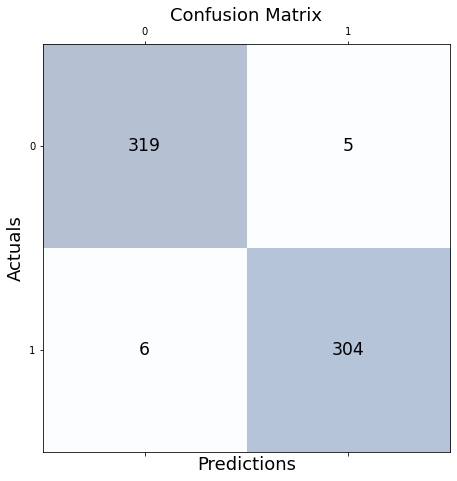


******* Training the Random Forest using the n_estimators=100 ********
Accuracy is: 0.9794952681388013
Precision is: 0.9805825242718447
Recall is: 0.9774193548387097
F1-Score is: 0.9789983844911146


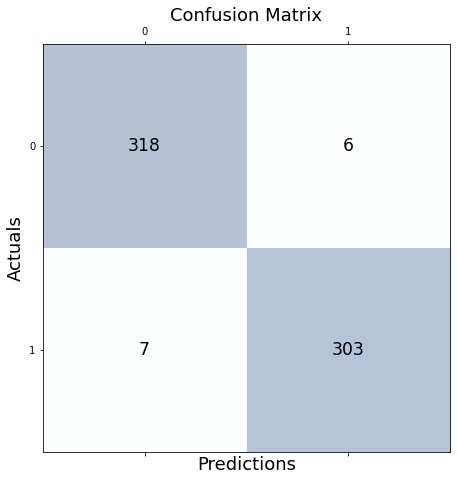


******* Training the Random Forest using the n_estimators=150 ********
Accuracy is: 0.9779179810725552
Precision is: 0.9743589743589743
Recall is: 0.9806451612903225
F1-Score is: 0.977491961414791


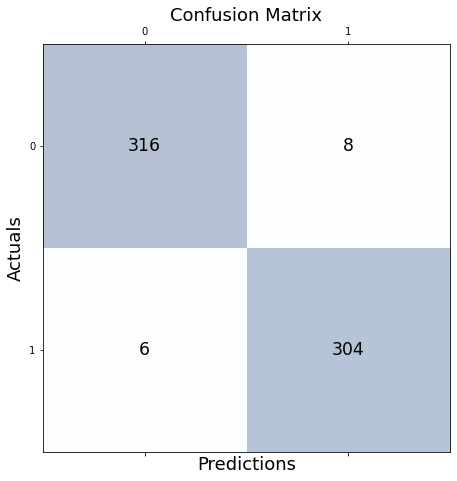


******* Training the Random Forest using the n_estimators=200 ********
Accuracy is: 0.9794952681388013
Precision is: 0.977491961414791
Recall is: 0.9806451612903225
F1-Score is: 0.9790660225442834


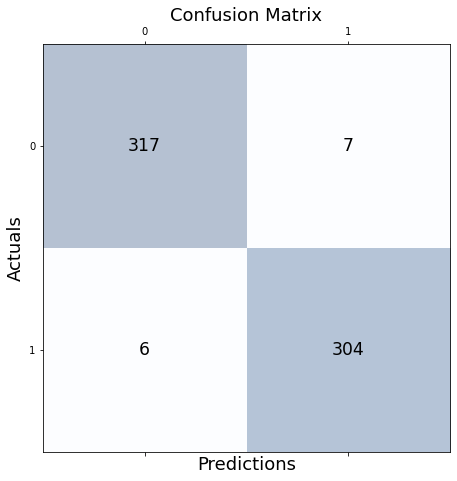

In [54]:
def random_trees_n_estimators(n_estimator):
    print('******* Training the Random Forest using the n_estimators='+str(n_estimator)+' ********')
    classifier= RandomForestClassifier(n_estimators=n_estimator, criterion="entropy")  
    classifier.fit(X_train, y_train)  
    y_pred= classifier.predict(X_test)
    
    print("Accuracy is:", accuracy_score(y_test, y_pred))
    print("Precision is:", precision_score(y_test, y_pred))
    print("Recall is:", recall_score(y_test, y_pred))
    print("F1-Score is:", f1_score(y_test, y_pred))
    
    # Creating the Confusion matrix  
    cm = confusion_matrix(y_test, y_pred)  
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()


for n_estimator in [10,50,100,150,200]:
    random_trees_n_estimators(n_estimator=n_estimator)

### Best value of no. of estimators (Decision Trees) is 200

# Random Forest with different types of criteria

******* Training the Random Forest using criteria=entropy ********
Accuracy is: 0.9763406940063092
Precision is: 0.9742765273311897
Recall is: 0.9774193548387097
F1-Score is: 0.9758454106280194


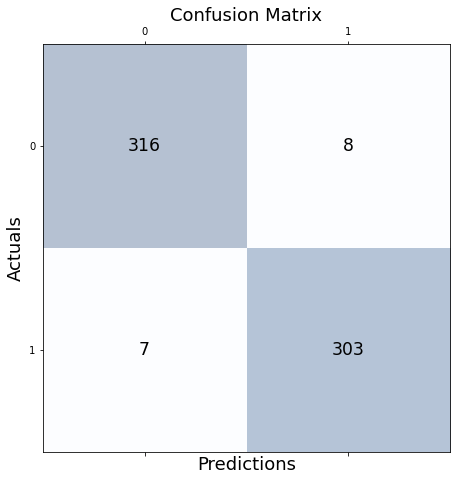


******* Training the Random Forest using criteria=gini ********
Accuracy is: 0.9826498422712934
Precision is: 0.9838187702265372
Recall is: 0.9806451612903225
F1-Score is: 0.9822294022617124


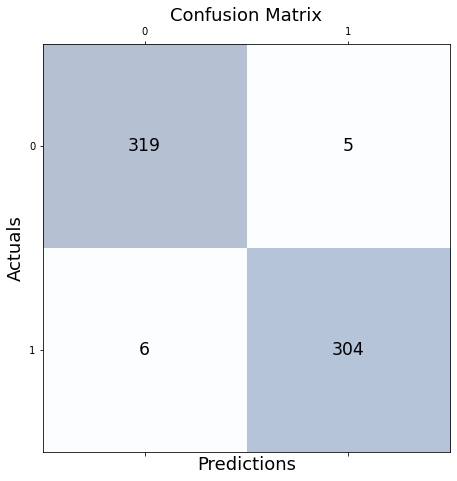

In [49]:
def random_trees_criteria(criteria):
    print('******* Training the Random Forest using criteria='+str(criteria)+' ********')
    classifier= RandomForestClassifier(n_estimators=200, criterion=criteria)  
    classifier.fit(X_train, y_train)  
    y_pred= classifier.predict(X_test)
    
    print("Accuracy is:", accuracy_score(y_test, y_pred))
    print("Precision is:", precision_score(y_test, y_pred))
    print("Recall is:", recall_score(y_test, y_pred))
    print("F1-Score is:", f1_score(y_test, y_pred))
    
    # Creating the Confusion matrix  
    cm = confusion_matrix(y_test, y_pred)  
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()


for criteria in ['entropy','gini']:
    random_trees_criteria(criteria)

### Best spilting criteria is 'Gini'

# Random Forest with different no. of max-depth in Decision trees

******* Training the Random Forest using max_depth=2 ********
Accuracy is: 0.9652996845425867
Precision is: 0.9528301886792453
Recall is: 0.9774193548387097
F1-Score is: 0.964968152866242


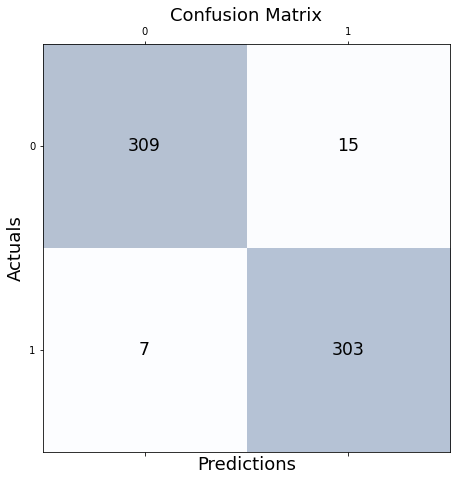


******* Training the Random Forest using max_depth=5 ********
Accuracy is: 0.9747634069400631
Precision is: 0.9711538461538461
Recall is: 0.9774193548387097
F1-Score is: 0.9742765273311896


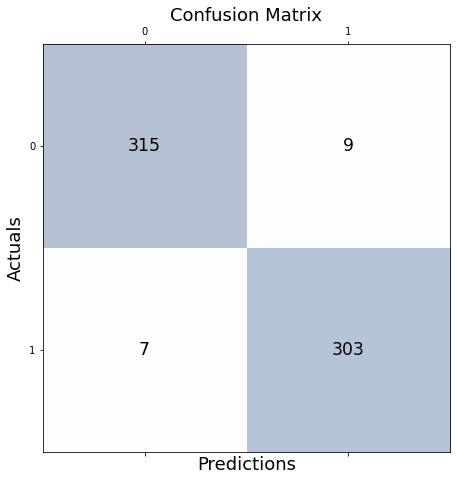


******* Training the Random Forest using max_depth=10 ********
Accuracy is: 0.9826498422712934
Precision is: 0.9807073954983923
Recall is: 0.9838709677419355
F1-Score is: 0.9822866344605475


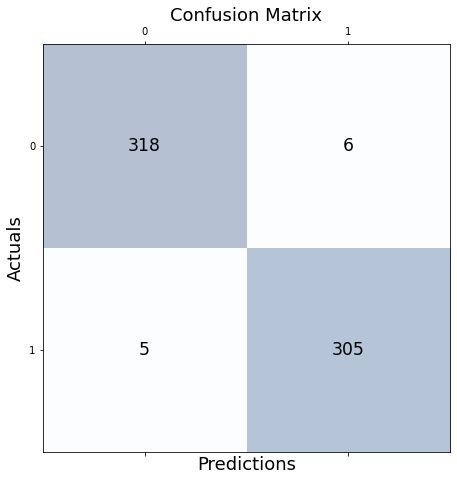

In [47]:
def random_trees_max_depth(max_depth):
    print('******* Training the Random Forest using max_depth='+str(max_depth)+' ********')
    classifier= RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=max_depth)
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    
    print("Accuracy is:", accuracy_score(y_test, y_pred))
    print("Precision is:", precision_score(y_test, y_pred))
    print("Recall is:", recall_score(y_test, y_pred))
    print("F1-Score is:", f1_score(y_test, y_pred))
    
    # Creating the Confusion matrix  
    cm = confusion_matrix(y_test, y_pred)  
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()


for depth in [2,5,10]:
    random_trees_max_depth(max_depth=depth)

### Best max-depth for Random forest is 10